In [1]:
# Importing necessary libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [2]:
# Path to the dataset folder (must contain your specific two types subfolders)
data = 'Car-Bike-Dataset'

In [3]:
# Creating a data generator for training data with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,               # Normalize pixel values to [0, 1]
    validation_split=0.2,         # Reserve 20% of data for validation
    rotation_range=40,            # Random rotation (±40 degrees)
    width_shift_range=0.2,        # Horizontal shift (±20%)
    height_shift_range=0.2,       # Vertical shift (±20%)
    shear_range=0.2,              # Shearing transformations
    zoom_range=0.2,               # Random zoom
    horizontal_flip=True,         # Randomly flip images horizontally
    fill_mode='nearest'           # Fill in new pixels after transform
)

In [4]:
# Data generator for validation (no augmentation, only rescaling)
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

In [5]:
# Create training data generator
train_generator = train_datagen.flow_from_directory(
    data,
    target_size=(150, 150),       # Resize all images to 150x150
    batch_size=32,
    class_mode='binary',          # Binary classification: Car or Bike
    subset='training'
)

Found 3200 images belonging to 2 classes.


In [6]:
# Create validation data generator
validation_generator = validation_datagen.flow_from_directory(
    data,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 800 images belonging to 2 classes.


In [7]:
# Building the CNN model
model = models.Sequential()

# First Convolutional Block
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

# Second Convolutional Block
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Third Convolutional Block
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Fourth Convolutional Block
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

# Flatten the output and add dense layers
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))    # Fully connected layer
model.add(layers.Dense(1, activation='sigmoid'))   # Output layer (binary classification)

c:\Users\saadt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
# Compile the model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [9]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=20,
    validation_data=validation_generator,
    validation_steps=50
)

c:\Users\saadt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/20
  8/100 ━━━━━━━━━━━━━━━━━━━━ 1:35 1s/step - accuracy: 0.5168 - loss: 0.7241

c:\Users\saadt\AppData\Local\Programs\Python\Python311\Lib\site-packages\PIL\Image.py:1043: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


100/100 ━━━━━━━━━━━━━━━━━━━━ 124s 1s/step - accuracy: 0.5665 - loss: 0.6843 - val_accuracy: 0.6175 - val_loss: 0.5939
Epoch 2/20


c:\Users\saadt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 483ms/step - accuracy: 0.7472 - loss: 0.5228 - val_accuracy: 0.8512 - val_loss: 0.3681
Epoch 3/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 53s 525ms/step - accuracy: 0.8137 - loss: 0.4249 - val_accuracy: 0.8462 - val_loss: 0.3764
Epoch 4/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 51s 504ms/step - accuracy: 0.8428 - loss: 0.3717 - val_accuracy: 0.8825 - val_loss: 0.3195
Epoch 5/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 49s 490ms/step - accuracy: 0.8815 - loss: 0.2970 - val_accuracy: 0.8838 - val_loss: 0.2696
Epoch 6/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 476ms/step - accuracy: 0.8805 - loss: 0.2930 - val_accuracy: 0.9162 - val_loss: 0.2322
Epoch 7/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 47s 473ms/step - accuracy: 0.8980 - loss: 0.2703 - val_accuracy: 0.9137 - val_loss: 0.2400
Epoch 8/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 48s 475ms/step - accuracy: 0.8973 - loss: 0.2516 - val_accuracy: 0.8850 - val_loss: 0.2824
Epoch 9/20
100/100 ━━━━━━━━━━━━━━━━━━━━ 68s 678ms/step - accuracy: 0.9150 - loss: 0.2368 - val

In [10]:
# Extracting training history for plotting
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

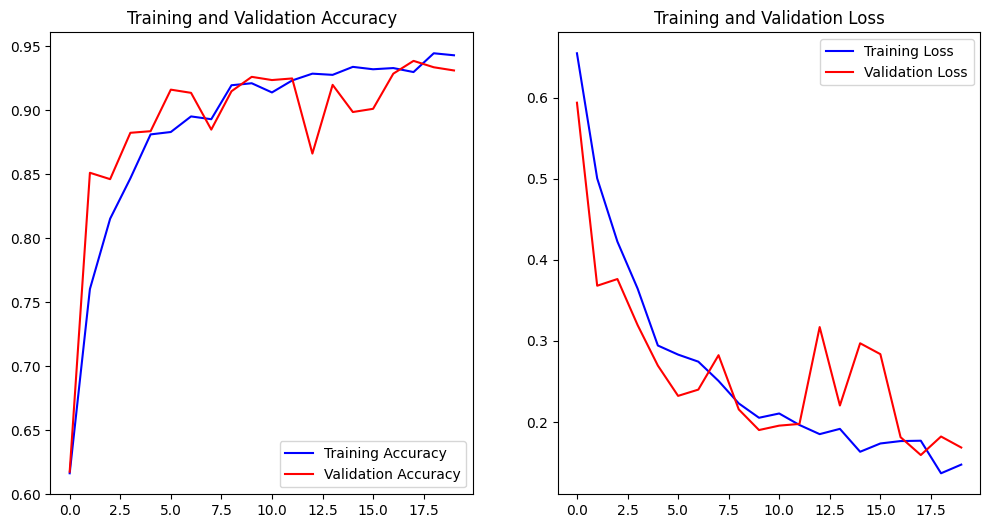

In [11]:
# Plotting accuracy and loss over epochs
plt.figure(figsize=(12, 6))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()

In [12]:
# Function to make prediction on a single image
def predict_image(model, img_path):
    """
    Loads an image, preprocesses it, and predicts whether it is a Car or a Bike.
    """
    img = image.load_img(img_path, target_size=(150, 150))     # Load image
    img_array = image.img_to_array(img)                         # Convert to array
    img_array = np.expand_dims(img_array, axis=0)               # Add batch dimension
    img_array /= 255.0                                          # Normalize

    prediction = model.predict(img_array)                       # Make prediction

    # Display prediction with confidence
    if prediction[0] > 0.5:
        print(f"The image is predicted to be a (item-1) with confidence {prediction[0][0]:.2f}")
    else:
        print(f"The image is predicted to be a (item-2) with confidence {1 - prediction[0][0]:.2f}")

In [ ]:
# Test prediction with a sample image
predict_image(model, 'abc')